# Clustering Anomaly Detection

# Exercises

Clustering - DBSCAN

In [1]:
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [11]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
import env as e

### Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.

In [3]:
query = '''SELECT * FROM grocery_customers'''

df1 = e.get_data('grocery_db', query, 'grocery')

Pulled from server and cached as CSV.
Rows and Columns: (440, 9)


In [6]:
df1

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,435,1,3,29703,12051,16027,13135,182,2204
436,436,1,3,39228,1431,764,4510,93,2346
437,437,2,3,14531,15488,30243,437,14841,1867
438,438,1,3,10290,1981,2232,1038,168,2125


In [89]:
# Make a df for fresh and grocery
fg = df1[['Fresh', 'Grocery']]

In [90]:
# Scale the data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(fg)

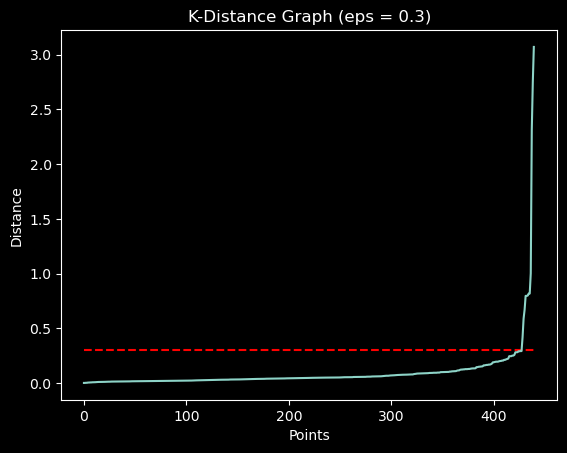

In [102]:
eps = 0.3

# Fit a nearest neighbors model to identify distances between points
neighbors_model = NearestNeighbors(n_neighbors=2)
neighbors_model.fit(scaled_data)
distances, indices = neighbors_model.kneighbors(scaled_data)

# Draw a dashed lined at eps value and label it
plt.hlines(y=eps, xmin=0, xmax=len(scaled_data), linestyles="dashed", colors='red') # type: ignore

# Sort the distances and plot them
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.ylabel("Distance")
plt.xlabel("Points")
plt.title(f"K-Distance Graph (eps = {eps})")
plt.show()

In [104]:
import pandas as pd

# Convert numpy array to pandas dataframe
df_scaled = pd.DataFrame(scaled_data, columns=['Fresh', 'Grocery'])
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=25)
df_scaled['cluster'] = dbscan.fit_predict(df_scaled)

# Count the number of unique clusters (including noise)
unique_clusters_sample = np.unique(df_scaled['cluster'])

print(unique_clusters_sample)

[-1  0]


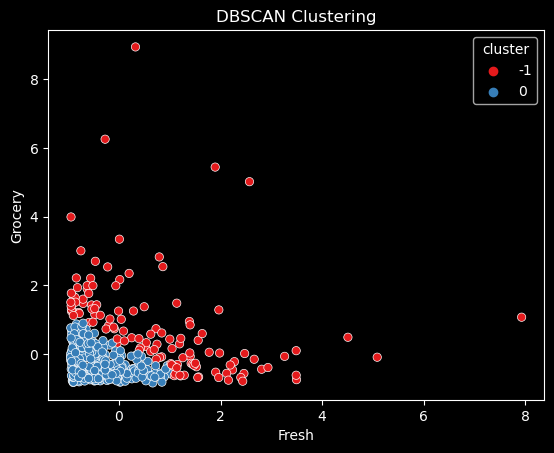

In [106]:
# Plot the clusters
sns.scatterplot(x='Fresh', y='Grocery', hue='cluster', data=df_scaled, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()


### Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.

In [111]:
query = '''SELECT * FROM logs'''

df2 = e.get_data('NA', query, 'logs.csv')

Used cached CSV.
Rows and Columns: (900223, 6)


In [112]:
df2

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86


In [115]:
# Combine df2.date and df2.time into datetime unix format
df2['datetime'] = df2['date'] + ' ' + df2['time']

# Make it unix time
df2['datetime'] = pd.to_datetime(df2['datetime'])

In [117]:
# Convert date to unix
df2['datetime'] = df2['datetime'].astype('int64') // 10**9

In [118]:
# Make clusters with df2 datetime and cohort_id
df2 = df2[['datetime', 'cohort_id']]

In [122]:
df2 = df2.dropna()

In [123]:
# Scale the data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

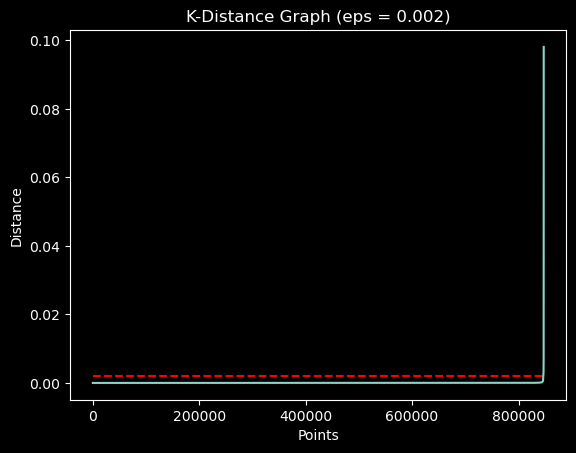

In [126]:
eps = 0.002

# Fit a nearest neighbors model to identify distances between points
neighbors_model = NearestNeighbors(n_neighbors=2)
neighbors_model.fit(scaled_data)
distances, indices = neighbors_model.kneighbors(scaled_data)

# Draw a dashed lined at eps value and label it
plt.hlines(y=eps, xmin=0, xmax=len(scaled_data), linestyles="dashed", colors='red') # type: ignore

# Sort the distances and plot them
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.ylabel("Distance")
plt.xlabel("Points")
plt.title(f"K-Distance Graph (eps = {eps})")
plt.show()

In [133]:
import pandas as pd

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.002, min_samples=30)
df2['cluster'] = dbscan.fit_predict(df2)

# Count the number of unique clusters (including noise)
unique_clusters_sample = np.unique(df2['cluster'])

print(unique_clusters_sample)

[-1  0  1]


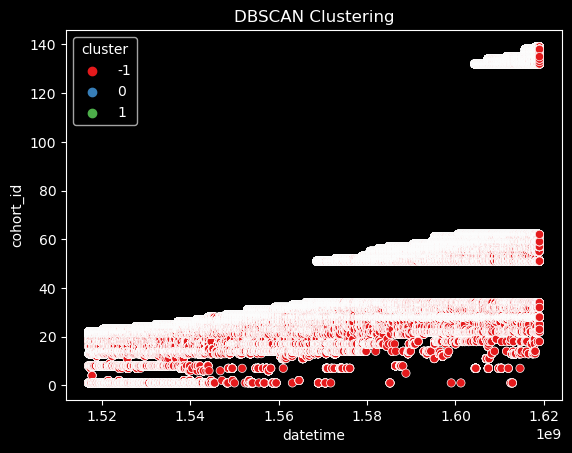

In [134]:
# Plot the clusters
sns.scatterplot(x='datetime', y='cohort_id', hue='cluster', data=df2, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()

### Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [5]:
df3 = e.get_data('NA', query, 'zillow.csv')

Used cached CSV.
Rows and Columns: (77613, 69)


In [9]:
df3.columns

Index(['typeconstructiontypeid', 'storytypeid', 'propertylandusetypeid',
       'parcelid', 'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid', 'id',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17',

In [65]:
df3['bedroomcnt'] = pd.to_numeric(df3['bedroomcnt'])

In [66]:
df3['calculatedfinishedsquarefeet'] = pd.to_numeric(df3['calculatedfinishedsquarefeet'])

In [67]:
# Drop NA
df3 = df3.dropna(subset=['bedroomcnt', 'calculatedfinishedsquarefeet'])

In [69]:
bed_sqfeet = df3[['bedroomcnt', 'calculatedfinishedsquarefeet']]

In [83]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(bed_sqfeet)

In [84]:
scaled_data

array([[0.25      , 0.08369002],
       [0.125     , 0.03764925],
       [0.1875    , 0.03139784],
       ...,
       [0.25      , 0.04178869],
       [0.1875    , 0.02545618],
       [0.1875    , 0.04601262]])

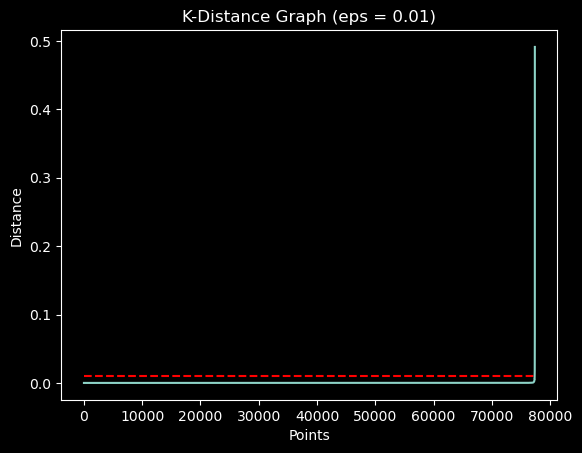

In [86]:
eps = 0.01

# Fit a nearest neighbors model to identify distances between points
neighbors_model = NearestNeighbors(n_neighbors=2)
neighbors_model.fit(scaled_data)
distances, indices = neighbors_model.kneighbors(scaled_data)

# Draw a dashed lined at eps value and label it
plt.hlines(y=eps, xmin=0, xmax=len(scaled_data), linestyles="dashed", colors='red') # type: ignore

# Sort the distances and plot them
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.ylabel("Distance")
plt.xlabel("Points")
plt.title(f"K-Distance Graph (eps = {eps})")
plt.show()

In [87]:
clusters = df3.copy()

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=125)
clusters['cluster'] = dbscan.fit_predict(scaled_data)

# Count the number of unique clusters (including noise)
unique_clusters_sample = np.unique(clusters['cluster'])

print(unique_clusters_sample)

[-1  0  1  2  3  4  5  6]


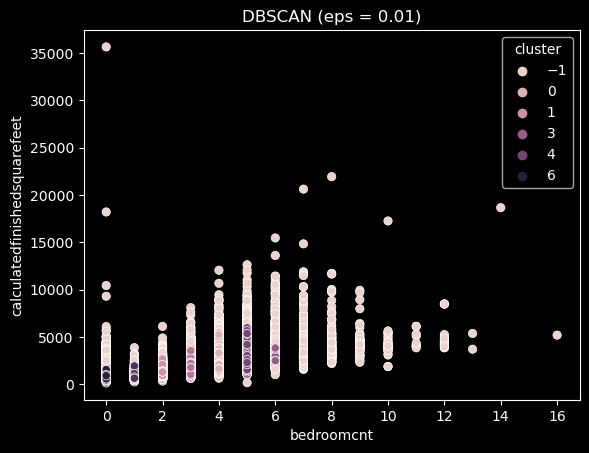

In [88]:
# Plot the clusters
sns.scatterplot(x='bedroomcnt', y='calculatedfinishedsquarefeet', hue='cluster', data=clusters)
plt.title(f"DBSCAN (eps = {eps})")
plt.show()


# Notes